<a href="https://colab.research.google.com/github/Hiji1023/mini_project/blob/main/pima_diabetes_bagging%2Cboosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn._config import get_config, set_config

# default setting
get_config()["print_changed_only"]

True

In [14]:
# now changing it
set_config(print_changed_only = False)

##필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boostcourse/data/diabetes_feature.csv')
df.shape

(768, 16)

## 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

* [결정 트리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC)
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)
* [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
* [배깅 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B9%85)
<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png">

이미지 출처 : https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png

## Single Tree

#### 시각화하기 쉬움

In [15]:
#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier(random_state = 42)
#model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

## Bagging


In [22]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state = 42)
#model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

## Boosting
* https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb3.png" width="600">

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 42, max_depth = 10)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## 학습, 예측하기

In [48]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
model.feature_importances_

array([0.09820631, 0.04628904, 0.09942072, 0.03291853, 0.05408423,
       0.1020376 , 0.00746545, 0.55957812, 0.        ])

In [50]:
feature_names = X_train.columns.tolist()

<Axes: >

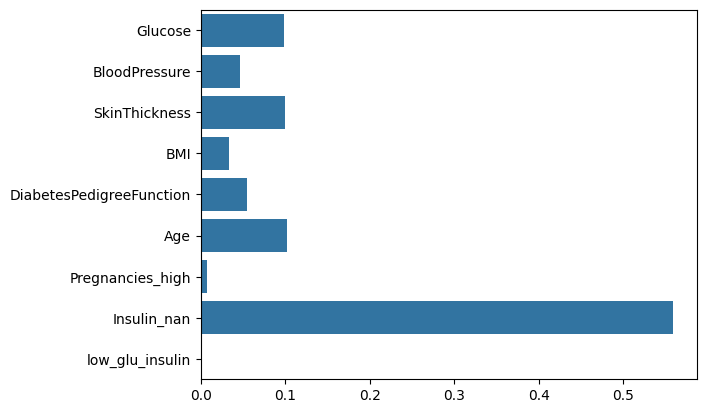

In [51]:
sns.barplot(x = model.feature_importances_, y =feature_names)

In [52]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

## 정확도 측정

In [53]:
# DT : 28
# RF : 20
# GB : 24
(y_predict != y_test).sum()

27

In [54]:
# DT : 0.818
# RF : 0.870
# GB : 0.844
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8246753246753247